# Fixed-point iteration: keep calm and apply $g(\cdot)$

_(Jupyter notebook by Simone Brugiapaglia)_

In this notebook we study the fixed-point iteration. This is a very general family of root-finding methods.

See Chapter 19 of 

*Q. Kong, T. Siauw, and A. M. Bayen. Python Programming and Numerical Methods: A Guide for Engineers and Scientists. Academic Press, 2021. (https://pythonnumericalmethods.berkeley.edu/)*

and Section 2.2 of 

*Richard L. Burden, J. Douglas Faires and Annette M. Burden. Numerical Analysis (10th Edition). Cengage, 2016.*

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Implementation of the method

First we define a `fixed_point` function, similar to the `bisection` function we created in the previous notebook. Notably, the fixed-point iteration admits an embarassingly simple implementation.

In [2]:
def fixed_point(g, p0, TOL, N_max):
    """
    Approximates the solution to a fixed-point equation g(x) = x via the fixed-point method 
    using p0 as initial guess, N_max maximum iterations, a tolerance criterion on the relative increment
    with parameter TOL (i.e., method stops when |p_n - p_{n-1}|/|p_n| <= TOL).

    The function returns an array containing the sequence of approximations computed by the method.
    """
    
    n = 0  # initialize iteration counter
    p = p0 # initialize current approximation 
    rel_increment = np.inf # initialize relative increment to enter the while loop
    p_array = np.array(p).reshape(1,1)  # initialize array of approximations
    
    while (n < N_max and rel_increment > TOL):
        n = n + 1 # increase iteration counter
        p = g(p)  # apply g 
        rel_increment = np.abs(p - p_array[-1]) / np.abs(p) # update relative increment
        p_array = np.vstack((p_array, p)) # add current approximation to array

    # maximum number of iterations reached, but return the array of approximations anyways
    return p_array 

## Example: computing $\sqrt{7}$

We will apply the fixed point method to approximate $p = \sqrt{7}$. Of course, $p$ is a root of the polynomial $f(x) = x^2-7$. To apply the fixed-point method, we first need to reformulate the equation $f(x) = 0$ as a fixed-point equation. A possible way to do this is by adding $x$ to both sides of the equation. This leads to 
$$
x^2 + x -7 = x,
$$
which is of the form $g(x) = x$, where $g(x) = x^2 + x -7$.

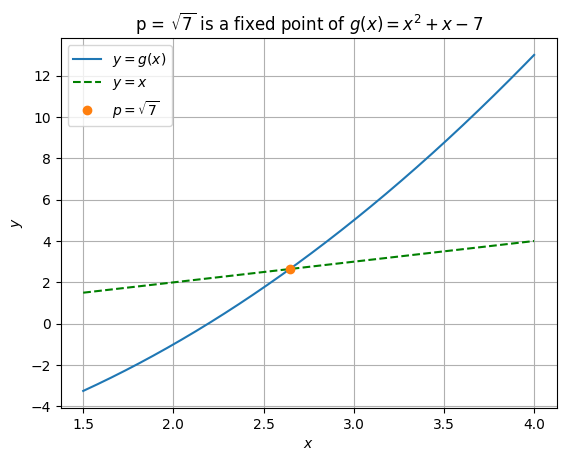

In [3]:
g = lambda x: x**2 + x - 7
x_grid = np.linspace(1.5,4,1000)
plt.plot(x_grid, g(x_grid), '-', label = '$y = g(x)$')
plt.plot(x_grid, x_grid, '--g', label = '$y = x$')
plt.plot(np.sqrt(7), np.sqrt(7), 'o', label = '$p = \sqrt{7}$')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("p = $\sqrt{7}$ is a fixed point of $g(x) = x^2 + x -7$")
plt.legend()
plt.show()

In [4]:
# set up method's parameters
p0 = 1.5
TOL = 1e-5
N_max  = 10

p_array = fixed_point(g, p0, TOL, N_max) # apply fixed-point method
p_array # print approximations

array([[ 1.50000000e+00],
       [-3.25000000e+00],
       [ 3.12500000e-01],
       [-6.58984375e+00],
       [ 2.98361969e+01],
       [ 9.13034842e+02],
       [ 8.34538658e+05],
       [ 6.96455606e+11],
       [ 4.85050412e+23],
       [ 2.35273902e+47],
       [ 5.53538089e+94]])

The fixed-point iteration is in this case clearly divergent. This is how the convergent plot of a divergent method looks like. 

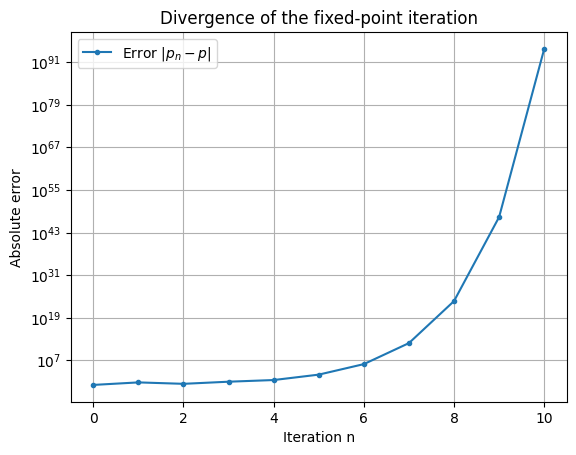

In [5]:
n_values = np.arange(p_array.size)
n_values

plt.semilogy(n_values, np.abs(p_array - np.sqrt(7)), '.-', label = 'Error $|p_n - p|$')
plt.xlabel("Iteration n")
plt.ylabel("Absolute error")
plt.title("Divergence of the fixed-point iteration")
plt.legend()
plt.grid()
plt.show()

## A convergent iteration

To obtain a convergent fixed-point iteration, we must change the definition of $g$. For example, $\sqrt{7}$ satisfies the fixed-point equation
$$
-\frac{x^2}{3}  + x + \frac{7}{3} = x
$$
which leads to defining $g_{\text{new}}(x) = -\frac{x^2}{3}  + x+ \frac{7}{3}$. Let's first verify this graphically.

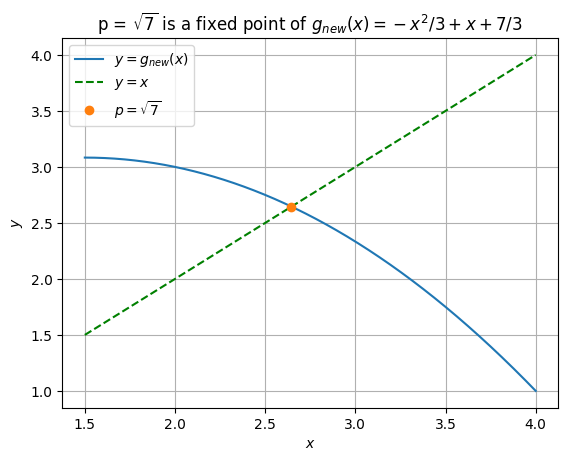

In [6]:
g_new = lambda x: -x**2/3 + x + 7/3
x_grid = np.linspace(1.5,4,1000)
p = np.sqrt(7)

# convergence plot
plt.plot(x_grid, g_new(x_grid), '-', label = '$y = g_{new}(x)$')
plt.plot(x_grid, x_grid, '--g', label = '$y = x$')
plt.plot(p, p, 'o', label = '$p = \sqrt{7}$')
plt.grid()
plt.title("p = $\sqrt{7}$ is a fixed point of $g_{new}(x) = -x^2/3  + x + 7/3$")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

In [7]:
# set up method's parameters
p0 = 1.5
TOL = 1e-5
N_max = 100

p_array = fixed_point(g_new, p0, TOL, N_max) # apply fixed-point method
p_array # print approximations

array([[1.5       ],
       [3.08333333],
       [2.24768519],
       [2.89698895],
       [2.43280729],
       [2.79329019],
       [2.52580016],
       [2.73257801],
       [2.57691715],
       [2.69674982],
       [2.60592996],
       [2.67563964],
       [2.62262381],
       [2.66323859],
       [2.63229199],
       [2.65597162],
       [2.63790987],
       [2.65172037],
       [2.64118006],
       [2.64923602],
       [2.64308552],
       [2.64778516],
       [2.64419641],
       [2.64693819],
       [2.64484426],
       [2.64644387],
       [2.64522215],
       [2.64615541],
       [2.64544259],
       [2.64598709],
       [2.6455712 ],
       [2.64588888],
       [2.64564623],
       [2.64583157],
       [2.64569   ],
       [2.64579814],
       [2.64571554],
       [2.64577863],
       [2.64573044],
       [2.64576725],
       [2.64573913],
       [2.64576061]])

Now the approximation is pretty good! In fact, the absolute error is

In [8]:
print(abs(p - p_array[-1]))

[9.30075658e-06]


From the theory, we know that the absolute approximation error can be bounded as 
$$
|p_n - p| \leq C k^n,
$$
for a suitable constant $C$, and where $k$ is an upper bound to $|g_{\text{new}}'(x)|$ around $x  = \sqrt{7}$. In this case, we have 
$$
|g'_{\text{new}}(\sqrt{7})| = -\frac23 \sqrt{7} + 1 \leq 0.764
$$

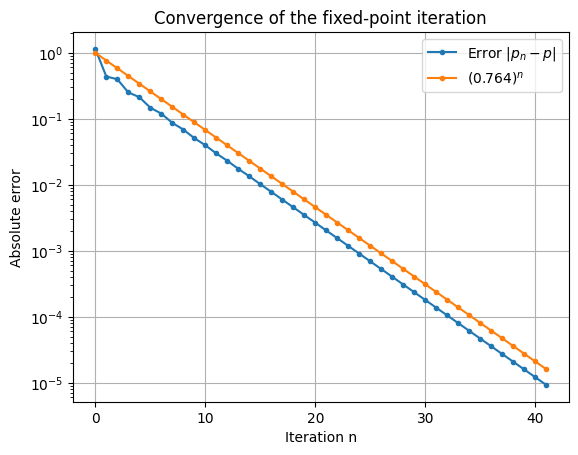

In [9]:
# convergence plot
n_values = np.arange(p_array.size)
n_values

plt.semilogy(n_values, np.abs(p_array - np.sqrt(7)), '.-', label = 'Error $|p_n - p|$')
plt.semilogy(n_values, 0.764**(n_values), '.-', label = '$(0.764)^n$')
plt.xlabel("Iteration n")
plt.ylabel("Absolute error")
plt.title("Convergence of the fixed-point iteration")
plt.legend()
plt.grid()
plt.show()

As expected, the convergence of $|p_n - p|$  and $k^n$ to $0$ are numerically comparable! (Recall what it means for two graphs to be parallel in a `loglog` plot from notebook [A visual tour of algorithms' convergence](https://github.com/simone-brugiapaglia/numerical-analysis-notebooks/blob/main/02_convergence.ipynb)). 

Finally, a minor comment. Note that the orange curve is below the blue curve for $n = 0$. Can you explain why?

## Recommended problems

Try to find other ways to compute $p = \sqrt{7}$ using the fixed-point iteration for other functions $g$. Can you achieve faster convergence than the $g_{\text{new}}$ in the notebook?

_Hint:_ Try to consider fixed-point equations of the form $\frac1m (x^2 -7 + mx) = x$, for $m \neq 0$. Use the convergence theory of the fixed-point iteration to find good choices of $m$. Is there an _optimal_ choice of $m$?